## Transfer learning with VGG16

- Used a batch size of 256 
- 10,000 samples for training
- 50 epochs for training
---

In [1]:
import os
import pickle

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
DATA_DIRECTORY = os.path.join(os.getcwd() + '/datasets/vgg16-test')
BATCH_SIZE = 128

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 3

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 2 

---
## Evaluate Model History

In [5]:
# Open serialized training history data for VGG-16 model.
with open(r'vgg16-history', "rb") as input_file:
            history = pickle.load(input_file, encoding='bytes')

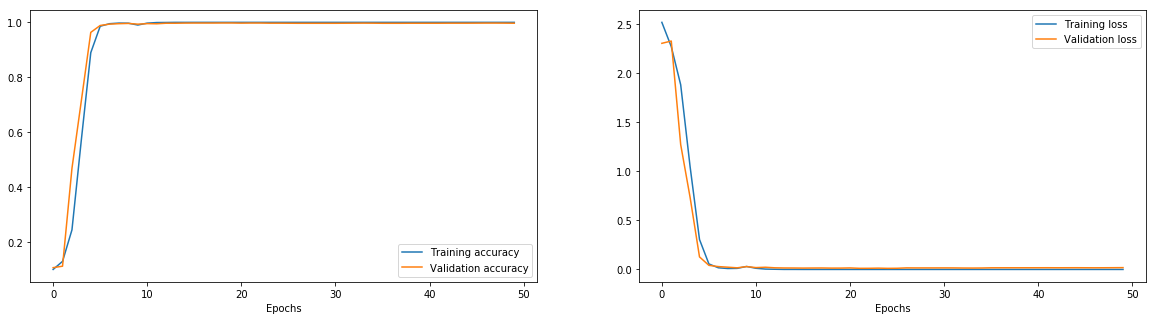

In [6]:
# Plot the training history.
figure, axes = pyplot.subplots(1, 2, figsize=(20, 5))

axes[0].plot(history[b'acc'], label='Training accuracy')
axes[0].plot(history[b'val_acc'], label='Validation accuracy')
axes[0].set_xlabel('Epochs')
axes[0].legend() 

axes[1].plot(history[b'loss'], label='Training loss')
axes[1].plot(history[b'val_loss'], label='Validation loss')
axes[1].set_xlabel('Epochs')
axes[1].legend()

---
## Evaluate Model Performance

In [7]:
model = models.load_model('vgg16')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 20)                92180     
_________________________________________________________________
reshape (Reshape)            (None, 2, 10

In [8]:
data_frame = create_captcha_dataframe(DATA_DIRECTORY)
data_frame.head()

,label,file
0,10,/home/tkimbr1/repositories/captcha-tensorflow/...
1,15,/home/tkimbr1/repositories/captcha-tensorflow/...
2,33,/home/tkimbr1/repositories/captcha-tensorflow/...
3,89,/home/tkimbr1/repositories/captcha-tensorflow/...
4,53,/home/tkimbr1/repositories/captcha-tensorflow/...


In [9]:
shuffled_indices = numpy.random.permutation(len(data_frame))
print('Test set:', len(shuffled_indices))

Test set: 1000


In [10]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=BATCH_SIZE)

dict(zip(model.metrics_names, model.evaluate(testing_set_generator, steps=len(shuffled_indices)//128)))

7/7 [==============================] - 2s 331ms/step - loss: 0.0089 - acc: 0.9967


{'acc': 0.99665177, 'loss': 0.0089402184331837421}

In [11]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=BATCH_SIZE)
captcha_images, captcha_text = next(testing_set_generator)

predictions = model.predict_on_batch(captcha_images)

true_values = tensorflow.math.argmax(captcha_text, axis=-1)
predictions = tensorflow.math.argmax(predictions, axis=-1)

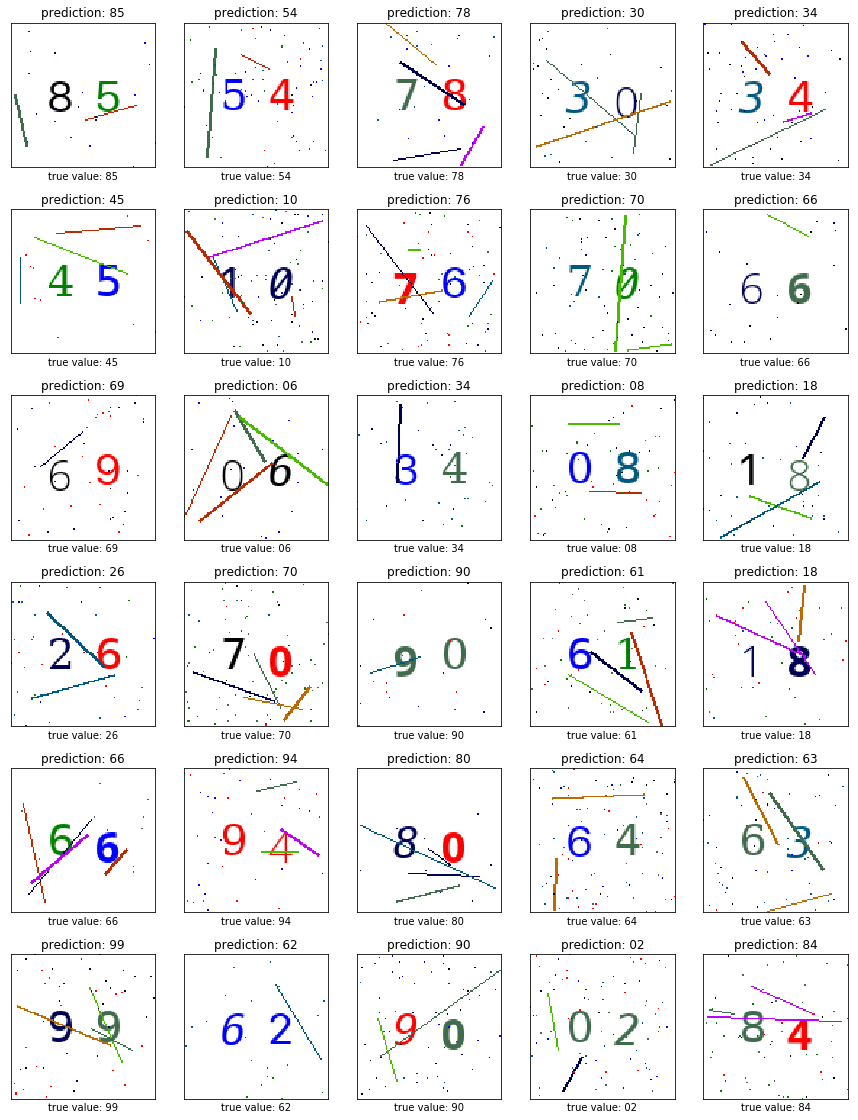

In [12]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)